K Means Clustering

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge#Here we set up the the standard scaler to the X_train data using fit()
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

number_of_cluters = 50

In [41]:
df = pd.read_csv('./raw_data/ny_2019_acs_block_group_data_zeroed.csv', na_values=".", skiprows=[0])

In [42]:
df

,Geo_FIPS,Geo_AREALAND,Geo_AREAWATR,ACS19_5yr_B01001001,ACS19_5yr_B01001002,ACS19_5yr_B01001003,ACS19_5yr_B01001004,ACS19_5yr_B01001005,ACS19_5yr_B01001006,ACS19_5yr_B01001007,...,PCT_ACS19_5yr_B23025002,PCT_ACS19_5yr_B23025003,PCT_ACS19_5yr_B23025004,PCT_ACS19_5yr_B23025005,PCT_ACS19_5yr_B23025006,PCT_ACS19_5yr_B23025007,ACS19_5yr_B19013001,ACS19_5yr_B19013A001,ACS19_5yr_B19013B001,ACS19_5yr_B19013D001
0,360010001001,2010546.0,245155.0,760,364,43,5,16,11,0,...,64.32,63.85,51.96,11.89,0.47,35.68,44821.0,0,0,0
1,360010001002,356866.0,0.0,1275,547,33,35,21,107,15,...,62.13,62.13,59.57,2.56,0.00,37.87,30361.0,0,0,0
2,360010002001,1449342.0,0.0,2188,994,155,93,127,0,0,...,69.46,69.46,59.03,10.43,0.00,30.54,24271.0,0,0,0
3,360010002002,206624.0,0.0,508,86,0,0,0,0,0,...,95.90,95.90,95.90,0.00,0.00,4.10,43220.0,0,0,0
4,360010002003,216940.0,0.0,1350,736,13,40,0,96,0,...,51.39,51.39,43.04,8.35,0.00,48.61,24646.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,361231504004,734110.0,48061.0,569,338,0,18,0,9,7,...,53.77,53.77,53.77,0.00,0.00,46.23,60625.0,0,0,0
15459,361231505001,81198648.0,43784.0,1650,805,56,62,75,49,25,...,60.42,60.42,57.75,2.67,0.00,39.58,65054.0,0,0,0
15460,361231505002,41094436.0,8395189.0,883,446,23,3,9,10,2,...,40.76,40.76,40.13,0.64,0.00,59.24,72679.0,0,0,0
15461,361231505003,24333240.0,15535.0,1139,420,10,18,25,11,0,...,46.64,46.64,44.54,2.10,0.00,53.36,36250.0,0,0,0


In [43]:
# Clean Data
# zip is not included beacuse that's an index, not a calculated value
df = df[['PCT_ACS19_5yr_B08134011',
            'PCT_ACS19_5yr_B08134061',
            'PCT_ACS19_5yr_B08134082',
            'PCT_ACS19_5yr_B08134083',
            'PCT_ACS19_5yr_B08134084',
            'PCT_ACS19_5yr_B08134085',
            'PCT_ACS19_5yr_B08134086',
            'PCT_ACS19_5yr_B08134087',
            'PCT_ACS19_5yr_B08134088',
            'PCT_ACS19_5yr_B08134089',
            'PCT_ACS19_5yr_B08134090',
            'PCT_ACS19_5yr_B08134091',
            'ACS19_5yr_B08301021',
            'PCT_ACS19_5yr_B08301012',
            'PCT_ACS19_5yr_B08301014',
            'PCT_ACS19_5yr_B08301021',
            'PCT_ACS19_5yr_B08134081']]



In [44]:
np.any(np.isnan(df))

False

In [45]:
np.all(np.isfinite(df))


True

In [46]:
df=df.dropna()

In [47]:
df

,PCT_ACS19_5yr_B08134011,PCT_ACS19_5yr_B08134061,PCT_ACS19_5yr_B08134082,PCT_ACS19_5yr_B08134083,PCT_ACS19_5yr_B08134084,PCT_ACS19_5yr_B08134085,PCT_ACS19_5yr_B08134086,PCT_ACS19_5yr_B08134087,PCT_ACS19_5yr_B08134088,PCT_ACS19_5yr_B08134089,PCT_ACS19_5yr_B08134090,PCT_ACS19_5yr_B08134091,ACS19_5yr_B08301021,PCT_ACS19_5yr_B08301012,PCT_ACS19_5yr_B08301014,PCT_ACS19_5yr_B08301021,PCT_ACS19_5yr_B08134081
0,83.54,13.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
1,90.11,9.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,2.50,0.0
2,56.59,43.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0,0.87,0.0
3,75.13,13.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
4,44.62,44.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,82.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
15459,78.82,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135,0.0,0.0,18.99,0.0
15460,85.66,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.0,0.0,13.11,0.0
15461,95.91,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,0.0,0.0,7.78,0.0


In [48]:
df =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

df

,PCT_ACS19_5yr_B08134011,PCT_ACS19_5yr_B08134061,PCT_ACS19_5yr_B08134082,PCT_ACS19_5yr_B08134083,PCT_ACS19_5yr_B08134084,PCT_ACS19_5yr_B08134085,PCT_ACS19_5yr_B08134086,PCT_ACS19_5yr_B08134087,PCT_ACS19_5yr_B08134088,PCT_ACS19_5yr_B08134089,PCT_ACS19_5yr_B08134090,PCT_ACS19_5yr_B08134091,ACS19_5yr_B08301021,PCT_ACS19_5yr_B08301012,PCT_ACS19_5yr_B08301014,PCT_ACS19_5yr_B08301021,PCT_ACS19_5yr_B08134081
0,83.54,13.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
1,90.11,9.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,2.50,0.0
2,56.59,43.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0,0.87,0.0
3,75.13,13.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
4,44.62,44.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,82.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
15459,78.82,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135,0.0,0.0,18.99,0.0
15460,85.66,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.0,0.0,13.11,0.0
15461,95.91,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,0.0,0.0,7.78,0.0


In [49]:
df

,PCT_ACS19_5yr_B08134011,PCT_ACS19_5yr_B08134061,PCT_ACS19_5yr_B08134082,PCT_ACS19_5yr_B08134083,PCT_ACS19_5yr_B08134084,PCT_ACS19_5yr_B08134085,PCT_ACS19_5yr_B08134086,PCT_ACS19_5yr_B08134087,PCT_ACS19_5yr_B08134088,PCT_ACS19_5yr_B08134089,PCT_ACS19_5yr_B08134090,PCT_ACS19_5yr_B08134091,ACS19_5yr_B08301021,PCT_ACS19_5yr_B08301012,PCT_ACS19_5yr_B08301014,PCT_ACS19_5yr_B08301021,PCT_ACS19_5yr_B08134081
0,83.54,13.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
1,90.11,9.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0,2.50,0.0
2,56.59,43.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0,0.87,0.0
3,75.13,13.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
4,44.62,44.42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15458,82.20,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.00,0.0
15459,78.82,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135,0.0,0.0,18.99,0.0
15460,85.66,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40,0.0,0.0,13.11,0.0
15461,95.91,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,0.0,0.0,7.78,0.0


In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=number_of_cluters, n_init=100) # default is 10

y_kmeans = kmeans.fit_predict(df)
df['cluster'] = kmeans.labels_

df = df.groupby('cluster').mean() #cluster means

df = df.sort_values(by=['PCT_ACS19_5yr_B08134081'], ascending=False)
df

,PCT_ACS19_5yr_B08134011,PCT_ACS19_5yr_B08134061,PCT_ACS19_5yr_B08134082,PCT_ACS19_5yr_B08134083,PCT_ACS19_5yr_B08134084,PCT_ACS19_5yr_B08134085,PCT_ACS19_5yr_B08134086,PCT_ACS19_5yr_B08134087,PCT_ACS19_5yr_B08134088,PCT_ACS19_5yr_B08134089,PCT_ACS19_5yr_B08134090,PCT_ACS19_5yr_B08134091,ACS19_5yr_B08301021,PCT_ACS19_5yr_B08301012,PCT_ACS19_5yr_B08301014,PCT_ACS19_5yr_B08301021,PCT_ACS19_5yr_B08134081
cluster,,,,,,,,,,,,,,,,,
27,7.584526,83.266034,0.162414,0.443621,1.032586,4.369397,4.010862,17.874009,21.045517,17.346810,12.197414,0.772974,6.413793,77.328836,0.189914,1.220862,78.482328
5,9.464809,85.422366,0.628092,0.358702,0.974275,1.537634,1.127786,8.161374,7.530916,14.501145,42.982443,0.916412,5.679389,76.245725,0.112366,1.732137,77.802061
12,6.895921,81.083553,0.320197,0.494605,2.287105,6.808947,5.566250,19.676118,17.300329,16.478092,7.457171,1.274803,69.960526,68.557368,0.143487,10.016579,76.388421
37,9.436423,80.556269,0.211808,0.353577,1.479769,4.204846,3.822000,15.689077,15.740077,19.911269,13.528577,1.117154,33.896154,70.777462,0.172962,5.292731,74.940577
22,9.372500,77.109338,0.250441,0.554485,2.050294,5.329338,4.205221,15.361324,13.811544,18.211544,11.719265,1.269191,113.955882,62.317279,0.236324,12.509926,71.491838
9,14.326259,76.392518,0.283885,0.201367,0.958561,1.700072,1.216619,6.437698,9.772878,21.736403,26.199137,1.123669,64.453237,61.750719,0.207050,9.462230,68.505396
44,14.623097,75.341355,0.226387,0.097000,0.731774,1.177516,1.511903,8.771065,9.367839,24.431032,18.812226,1.099581,4.822581,64.371839,0.189710,0.856903,65.126871
33,8.592778,67.171250,0.040139,0.424444,2.588889,9.395278,5.478472,16.111806,9.098750,10.901389,6.646667,1.980556,174.694444,49.375833,0.468472,17.869306,60.685000
7,6.903333,68.254167,0.295417,0.110000,3.763750,7.533333,7.029583,16.841250,9.402917,7.165833,8.295000,1.800417,256.625000,46.872500,0.084167,21.957083,60.437500


In [ ]:
# conduct ols regression
# conduct k means clustering
# for commute times per means of all public transit except taxicab, subway & rail, vehicle, median income, population density
# 'vehicles_per_worker',
#  'population_density',
#  'pct_unemployed',
#  'sqrt_land_area',
#  'cbp_total_employees',
#  'cbp_total_establishments',
#  'pct_all_public_tspt_wrkr_cmute','pct_walked_wrkr_cmute']]

<AxesSubplot: ylabel='cluster'>

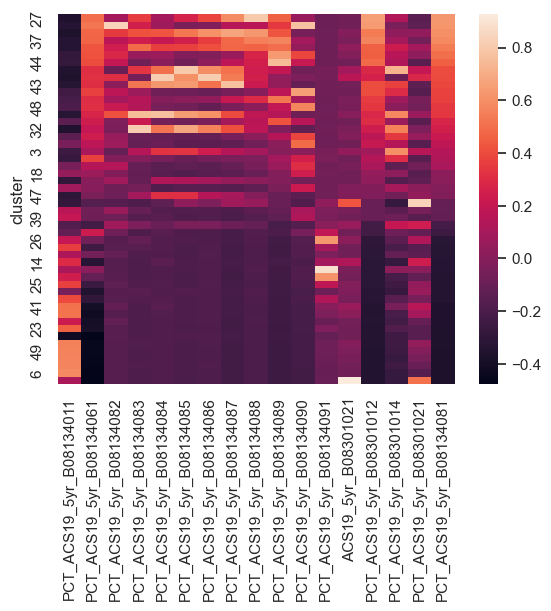

In [51]:
df_norm = (df - df.mean()) / (df.max() - df.min())
sns.heatmap(df_norm)